In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("https://github.com/ybifoundation/Dataset/raw/main/Bike%20Prices.csv")
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  1061 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
dtype: int64

In [ ]:
df.replace({'Owner': {'1st owner': 0,
                      '2nd owner': 1,
                      '3rd owner': 2,
                      '4th owner': 3}}, inplace=True)

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     1055
Dealer            6
dtype: int64

In [ ]:
df.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1}}, inplace=True)

In [ ]:
Y = df['Selling_Price']

In [ ]:
X = df.drop(['Selling_Price', 'Brand', 'Model'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=2529)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1822072076.271505

In [ ]:
mean_absolute_error(y_test, y_pred)

29566.125218971618

In [ ]:
r2_score(y_test, y_pred)

0.4903147142014005

Text(0.5, 1.0, 'Actual Price Vs Predicted Price')

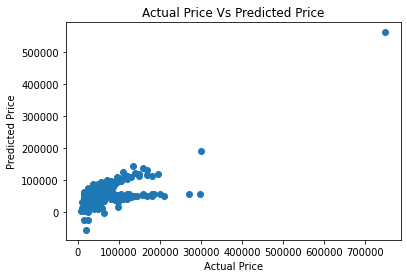

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')